In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading data

In [4]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [13]:
import seaborn as sns

In [32]:
cmap=sns.diverging_palette(300,150,n=8)

<AxesSubplot:>

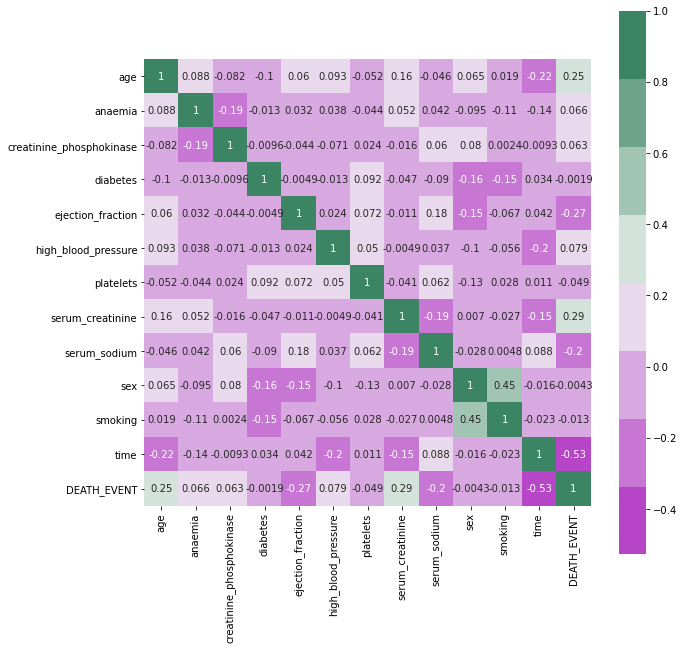

In [33]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap=cmap,annot=True,square=True)

In [34]:
x=df.drop(['time','DEATH_EVENT'],axis=1)
y=df['DEATH_EVENT']

In [36]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

### importing dependencies

In [39]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

### building model

In [42]:
model=Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [45]:
model.fit(x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
7/7 [==============================] - 3s 14ms/step - loss: 9940441088.0000 - accuracy: 0.6339
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.7143
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.7143
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.7143
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.7143
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.7143
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.7143
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.7143
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.7143
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.7143
Epoch 11/200
7/7 [=

In [47]:
y_hat = model.predict(x_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

In [49]:
print((accuracy_score(y_test, y_hat))*100)

57.333333333333336


### accuracy = 57.33%